Using sheet: Heart_disease
Shape: (908, 13)

Head:
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  

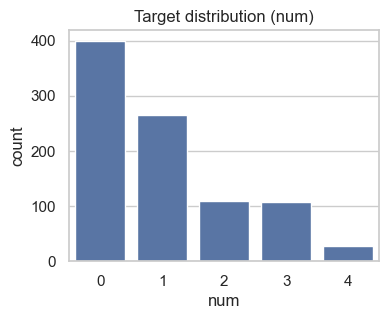

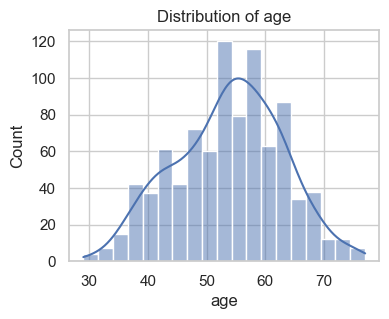

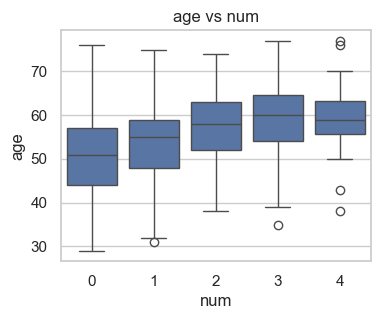

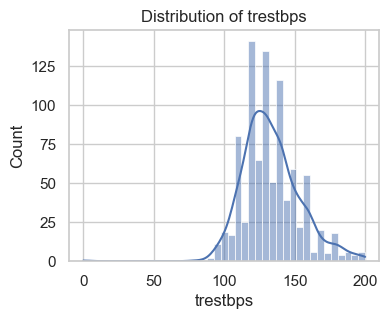

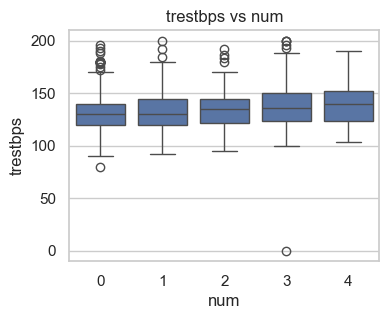

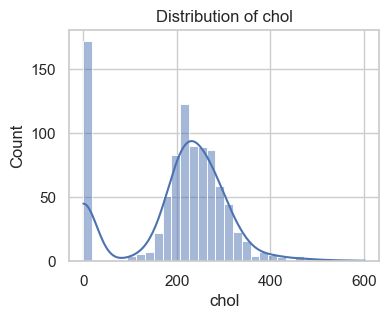

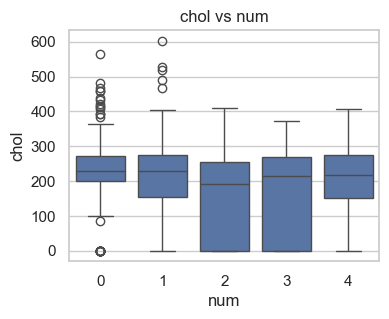

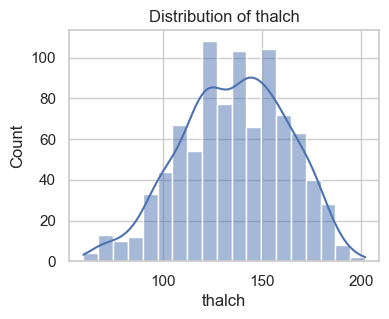

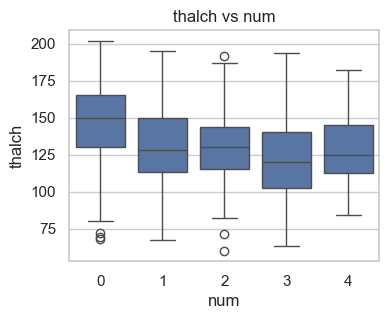

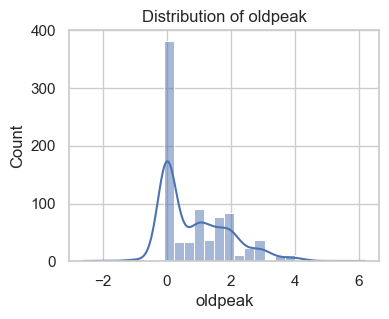

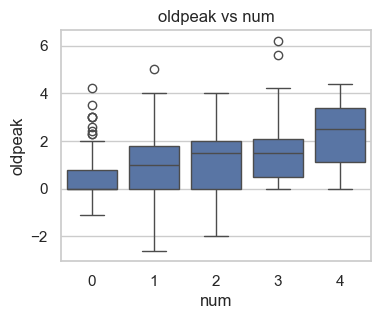

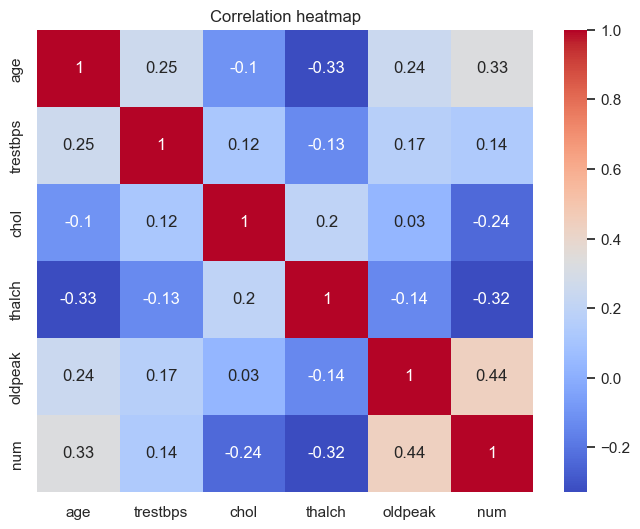

Categorical columns (will be label‑encoded): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Done label‑encoding.

X_train shape: (635, 12)
X_test shape: (273, 12)

=== Baseline Decision Tree Evaluation ===
Accuracy (multi‑class): 0.4981684981684982
Precision (binary 0 vs >0): 0.75625
Recall (binary 0 vs >0): 0.7908496732026143
F1‑score (binary 0 vs >0): 0.7731629392971247
ROC‑AUC (binary 0 vs >0): 0.7329248366013071

Classification report (multi‑class):
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       120
           1       0.45      0.46      0.46        80
           2       0.25      0.30      0.27        33
           3       0.22      0.22      0.22        32
           4       0.17      0.12      0.14         8

    accuracy                           0.50       273
   macro avg       0.36      0.36      0.36       273
weighted avg       0.51      0.50      0.50       273



C:\Users\Shreyas Mahale\AppData\Local\Temp\ipykernel_9212\2219769686.py:81: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_proc[col].fillna(df_proc[col].median(), inplace=True)
C:\Users\Shreyas Mahale\AppData\Local\Temp\ipykernel_9212\2219769686.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

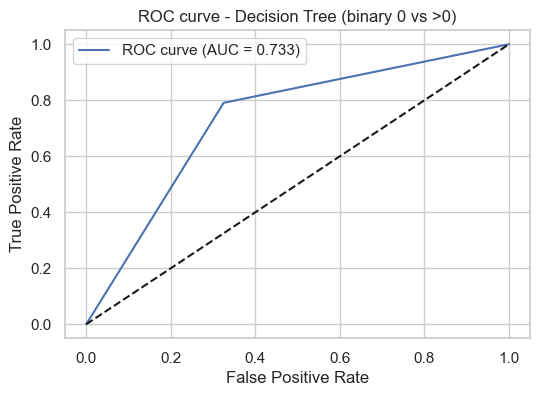


Best params from GridSearchCV: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV accuracy: 0.5354330708661418

=== Tuned Decision Tree Evaluation ===
Accuracy (multi‑class): 0.5238095238095238
Precision (binary 0 vs >0): 0.8106060606060606
Recall (binary 0 vs >0): 0.6993464052287581
F1‑score (binary 0 vs >0): 0.7508771929824561
ROC‑AUC (binary 0 vs >0): 0.8130718954248366

Classification report (multi‑class):
               precision    recall  f1-score   support

           0       0.67      0.79      0.73       120
           1       0.47      0.50      0.48        80
           2       0.13      0.15      0.14        33
           3       0.43      0.09      0.15        32
           4       0.00      0.00      0.00         8

    accuracy                           0.52       273
   macro avg       0.34      0.31      0.30       273
weighted avg       0.50      0.52      0.50       273



c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

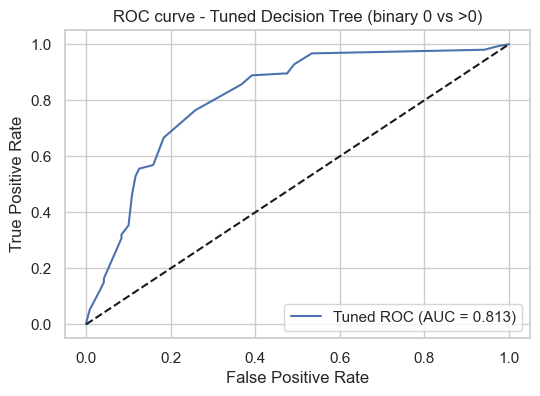


=== Feature importances (tuned tree) ===
     feature  importance
2         cp    0.378728
9    oldpeak    0.098309
0        age    0.097938
7     thalch    0.093934
8      exang    0.084132
4       chol    0.078279
3   trestbps    0.054072
1        sex    0.050263
5        fbs    0.032312
11      thal    0.032034
6    restecg    0.000000
10     slope    0.000000


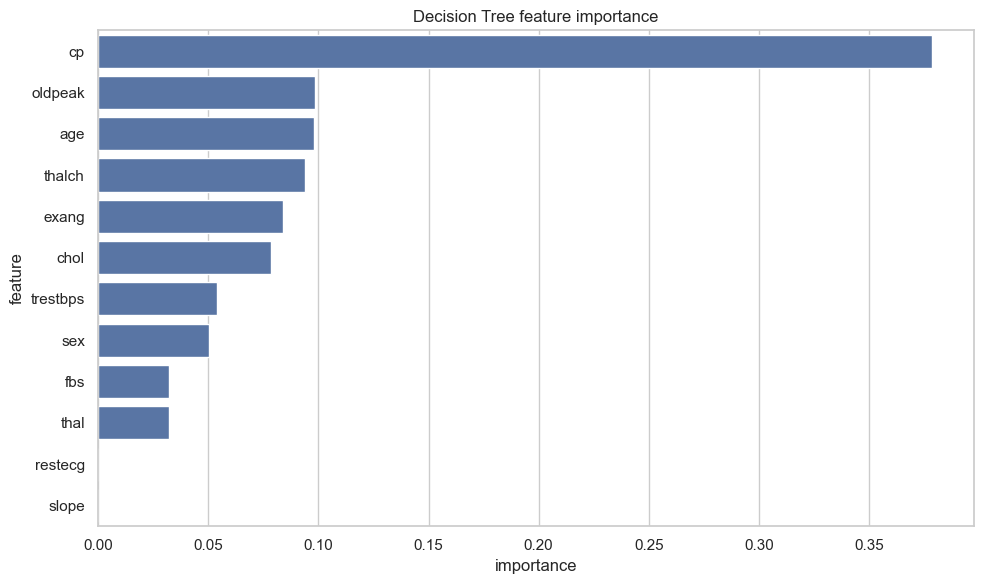

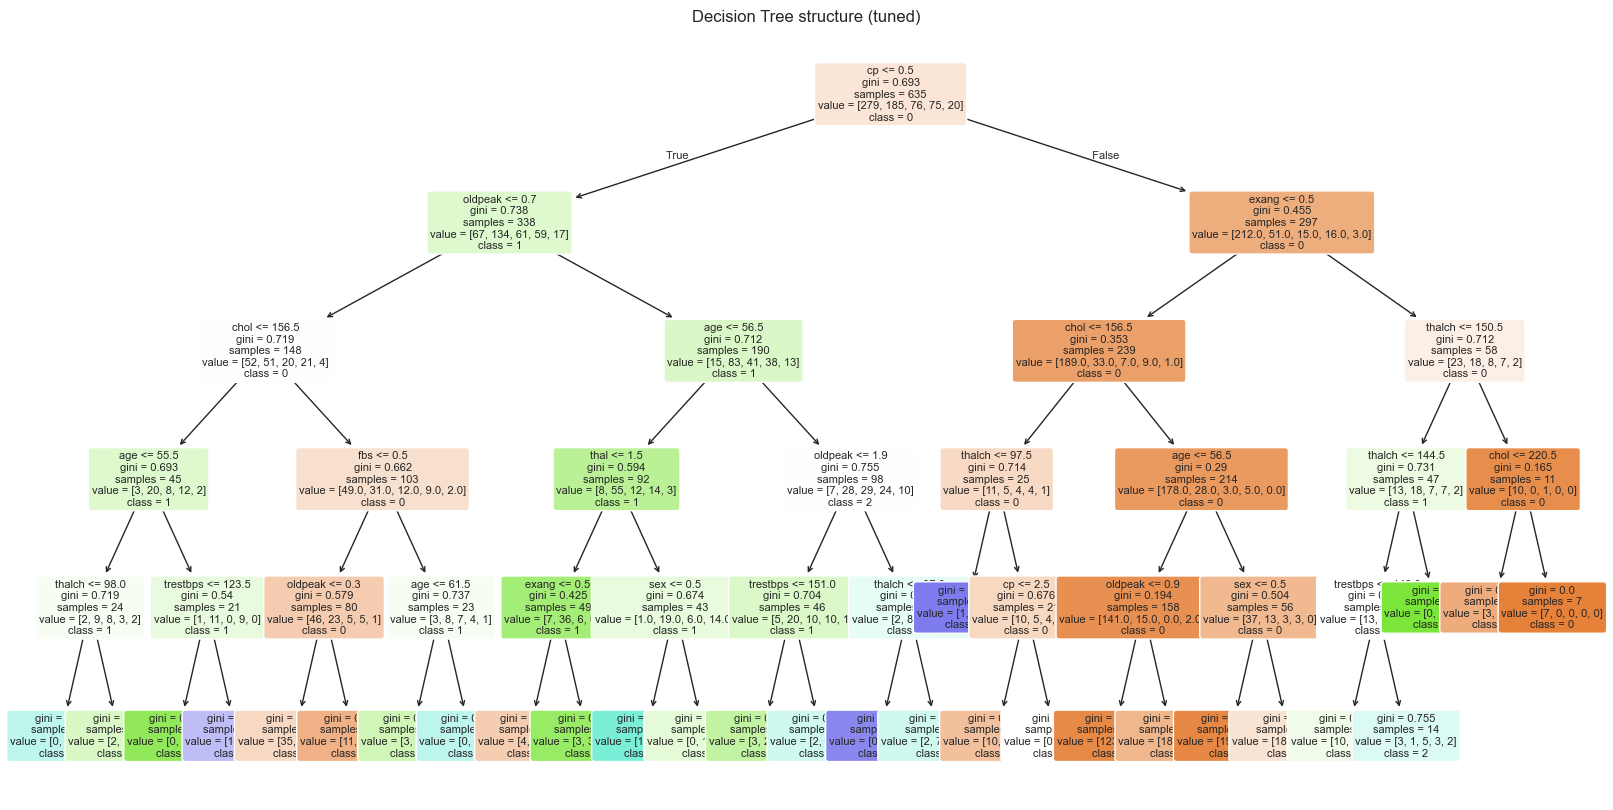


--- Hyperparameter impact (illustrative) ---
max_depth=2: accuracy=0.502
max_depth=4: accuracy=0.542
max_depth=6: accuracy=0.557
max_depth=None: accuracy=0.498

Interpretation:
- Smaller max_depth -> simpler tree, lower variance, may underfit.
- Larger / None -> more complex tree, higher variance, risk of overfitting.
- min_samples_split controls how easily nodes split (larger = smoother tree).
- min_samples_leaf enforces minimum samples per leaf (helps reduce overfitting).
- criterion (gini/entropy/log_loss) changes how split quality is measured.

Encoding note:
Label Encoding maps categories to integers (used above because Decision Trees
can handle ordinal-looking integers without distance assumptions).
One-Hot Encoding creates binary columns per category and is often preferred for
linear / distance-based models to avoid artificial ordering.



In [1]:
# ===== 1. Imports of the required libraries =====
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report)

sns.set(style="whitegrid")

# ===== 2. Loading the required data from Excel =====

df = pd.read_excel("C:\\Users\\Shreyas Mahale\\Downloads\\Decision Tree\\Decision Tree\\heart_disease.xlsx", sheet_name=None)

candidate = None
for name, frame in df.items():
    if "num" in frame.columns:
        candidate = frame
        print("Using sheet:", name)
        break

if candidate is None:
    raise ValueError("I could not find a sheet with 'num' column. Please verify the file and check again.")

data = candidate.copy()

print("Shape:", data.shape)
print("\nHead:")
print(data.head())
print("\nInfo:")
print(data.info())
print("\nTail:")
print(data.tail())
print("\nDescribe(include='all'):")
print(data.describe(include="all"))

# ===== 3. Basic Exploratory Data Analysis =====

# Target distribution (assuming 'num' is 0 = no disease, >0 = disease stage)
plt.figure(figsize=(4,3))
sns.countplot(x="num", data=data)
plt.title("Target distribution (num)")
plt.show()

# Numeric vs target
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if "num" in numeric_cols:
    numeric_cols.remove("num")

for col in numeric_cols:
    plt.figure(figsize=(4,3))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(4,3))
    sns.boxplot(x="num", y=col, data=data)
    plt.title(f"{col} vs num")
    plt.show()

# Correlation heatmap
if numeric_cols:
    corr_cols = numeric_cols + ["num"]
    plt.figure(figsize=(8,6))
    sns.heatmap(data[corr_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation heatmap")
    plt.show()

# ===== 4. Feature engineering / preprocessing (FIXED) =====

df_proc = data.copy()

# 4.1 Handle missing values first!
for col in df_proc.columns:
    if df_proc[col].dtype == "O":  # object / string
        df_proc[col].fillna(df_proc[col].mode()[0], inplace=True)
    else:
        df_proc[col].fillna(df_proc[col].median(), inplace=True)

# 4.2 Ensure a clean target
target_col = "num"
X = df_proc.drop(columns=[target_col])
y = df_proc[target_col]

# 4.3 Coercing all non‑numeric features to string, and normalize booleans
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

for col in cat_cols:
    # convert bools to string 'TRUE'/'FALSE' first
    if X[col].dtype == bool:
        X[col] = X[col].map({True: "TRUE", False: "FALSE"})
    # now forcing everything to string (as this removes the ['bool','str'] mix)
    X[col] = X[col].astype(str).str.strip().str.upper()

print("Categorical columns (will be label‑encoded):", cat_cols)

# 4.4 Label encode the categorical columns
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

print("Done label‑encoding.")

# ===== 5. Train‑test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# ===== 6. Baseline Decision Tree model =====
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Below, we convert to binary: 0 vs >0
y_test_bin = (y_test > 0).astype(int)
y_pred_bin = (y_pred > 0).astype(int)
y_proba_bin = dt.predict_proba(X_test)[:, dt.classes_ != 0].max(axis=1)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test_bin, y_pred_bin)
rec = recall_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)
roc_auc = roc_auc_score(y_test_bin, y_proba_bin)

print("\n=== Baseline Decision Tree Evaluation ===")
print("Accuracy (multi‑class):", acc)
print("Precision (binary 0 vs >0):", prec)
print("Recall (binary 0 vs >0):", rec)
print("F1‑score (binary 0 vs >0):", f1)
print("ROC‑AUC (binary 0 vs >0):", roc_auc)
print("\nClassification report (multi‑class):\n", classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba_bin)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve - Decision Tree (binary 0 vs >0)")
plt.legend()
plt.grid(True)
plt.show()

# ===== 7. Hyperparameter tuning with GridSearchCV =====
param_grid = {
    "max_depth": [3, 4, 5, 6, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy", "log_loss"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid.fit(X_train, y_train)

print("\nBest params from GridSearchCV:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_dt = grid.best_estimator_

y_pred_tuned = best_dt.predict(X_test)
y_test_bin_tuned = (y_test > 0).astype(int)
y_pred_bin_tuned = (y_pred_tuned > 0).astype(int)
y_proba_bin_tuned = best_dt.predict_proba(X_test)[:, best_dt.classes_ != 0].max(axis=1)

acc_t = accuracy_score(y_test, y_pred_tuned)
prec_t = precision_score(y_test_bin_tuned, y_pred_bin_tuned)
rec_t = recall_score(y_test_bin_tuned, y_pred_bin_tuned)
f1_t = f1_score(y_test_bin_tuned, y_pred_bin_tuned)
roc_auc_t = roc_auc_score(y_test_bin_tuned, y_proba_bin_tuned)

print("\n=== Tuned Decision Tree Evaluation ===")
print("Accuracy (multi‑class):", acc_t)
print("Precision (binary 0 vs >0):", prec_t)
print("Recall (binary 0 vs >0):", rec_t)
print("F1‑score (binary 0 vs >0):", f1_t)
print("ROC‑AUC (binary 0 vs >0):", roc_auc_t)
print("\nClassification report (multi‑class):\n", classification_report(y_test, y_pred_tuned))

fpr_t, tpr_t, thresholds_t = roc_curve(y_test_bin_tuned, y_proba_bin_tuned)
plt.figure(figsize=(6,4))
plt.plot(fpr_t, tpr_t, label=f"Tuned ROC (AUC = {roc_auc_t:.3f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve - Tuned Decision Tree (binary 0 vs >0)")
plt.legend()
plt.grid(True)
plt.show()

# ===== 8. Feature importance & tree visualization =====
importances = best_dt.feature_importances_
feat_imp = pd.DataFrame({"feature": X.columns, "importance": importances})
feat_imp = feat_imp.sort_values(by="importance", ascending=False)
print("\n=== Feature importances (tuned tree) ===")
print(feat_imp)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_imp)
plt.title("Decision Tree feature importance")
plt.tight_layout()
plt.show()

# Plot the tree (small max_depth recommended for readability)
plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree structure (tuned)")
plt.show()


# ===== 7A. Explicit Hyperparameter Impact Demonstration =====
# This small experiment shows how key hyperparameters affect performance.

print("\n--- Hyperparameter impact (illustrative) ---")
test_depths = [2, 4, 6, None]
for d in test_depths:
    tmp = DecisionTreeClassifier(max_depth=d, random_state=42)
    tmp.fit(X_train, y_train)
    yp = tmp.predict(X_test)
    acc_d = accuracy_score(y_test, yp)
    print(f"max_depth={d}: accuracy={acc_d:.3f}")

print("""\nInterpretation:
- Smaller max_depth -> simpler tree, lower variance, may underfit.
- Larger / None -> more complex tree, higher variance, risk of overfitting.
- min_samples_split controls how easily nodes split (larger = smoother tree).
- min_samples_leaf enforces minimum samples per leaf (helps reduce overfitting).
- criterion (gini/entropy/log_loss) changes how split quality is measured.
""")

# ===== 7B. Encoding clarification (already applied above) =====
print("""Encoding note:
Label Encoding maps categories to integers (used above because Decision Trees
can handle ordinal-looking integers without distance assumptions).
One-Hot Encoding creates binary columns per category and is often preferred for
linear / distance-based models to avoid artificial ordering.
""")

In [2]:
'''
Interview Questions:

Q.1) What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans:- Common hyperparameters of decision tree models include:
a. max_depth: Controls the maximum depth of the tree. A deeper tree can capture more complex patterns but may lead to overfitting. A shallower tree may underfit the data.
b. min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns, reducing overfitting.
c. min_samples_leaf: The minimum number of samples required to be at a leaf node. This helps ensure that leaves have enough data points, which can improve generalization.
d. criterion: This is the function used to measure the quality of a split (e.g., 'gini', 'entropy', 'log_loss'). Different criteria can lead to different tree structures and performance.

Q.2) What is the difference between the Label encoding and One-hot encoding?
Ans:- Label encoding assigns a unique integer to each category in a categorical variable. It is suitable for ordinal data where the categories have a natural order. However, it introduces an artificial ordering that may not exist in the data.
One-hot encoding creates binary columns for each category in a categorical variable. Each binary column represents whether a sample belongs to a specific category or not. This method is suitable for nominal data where there is no natural ordering among categories.
'''

"\nInterview Questions:\n\nQ.1) What are some common hyperparameters of decision tree models, and how do they affect the model's performance?\nAns:- Common hyperparameters of decision tree models include:\na. max_depth: Controls the maximum depth of the tree. A deeper tree can capture more complex patterns but may lead to overfitting. A shallower tree may underfit the data.\nb. min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns, reducing overfitting.\nc. min_samples_leaf: The minimum number of samples required to be at a leaf node. This helps ensure that leaves have enough data points, which can improve generalization.\nd. criterion: This is the function used to measure the quality of a split (e.g., 'gini', 'entropy', 'log_loss'). Different criteria can lead to different tree structures and performance.\n\nQ.2) What is the difference between the Label encoding and One-hot encoding?\